# Extension to Complex Plane of alternate choice of radiation mode classes

I found that the paper's method of choosing classes loses the property of being even and odd for complex Z.  This is because the vectors the choose for class A and B (v1 and v2), aren't in null space of M +- B unless Z is real.  I have another method that fixes this in theory, here I'm trying to make it work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.linalg import eig
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.integrate import quad
from scipy.optimize import newton

%matplotlib widget

In [2]:
A = SlabExact(ns=[1.4, 1.5, 1.4], ts=[3e-6, 1e-6, 3e-6], wl=.9e-6, symmetric=True) 

# A = SlabExact(ns=[1.44, 1.45, 1.46, 1.44], ts=[2e-6, 2e-6, 2e-6, 2e-6], xrefs=[100,100,100,100],symmetric=True)

In [3]:
Z = 5+.5j
Fe = A.fields_Z(Z, paper_method=False, mode_type='radiation')
Fo = A.fields_Z(Z, paper_method=False, mode_type='radiation', sign='-1')

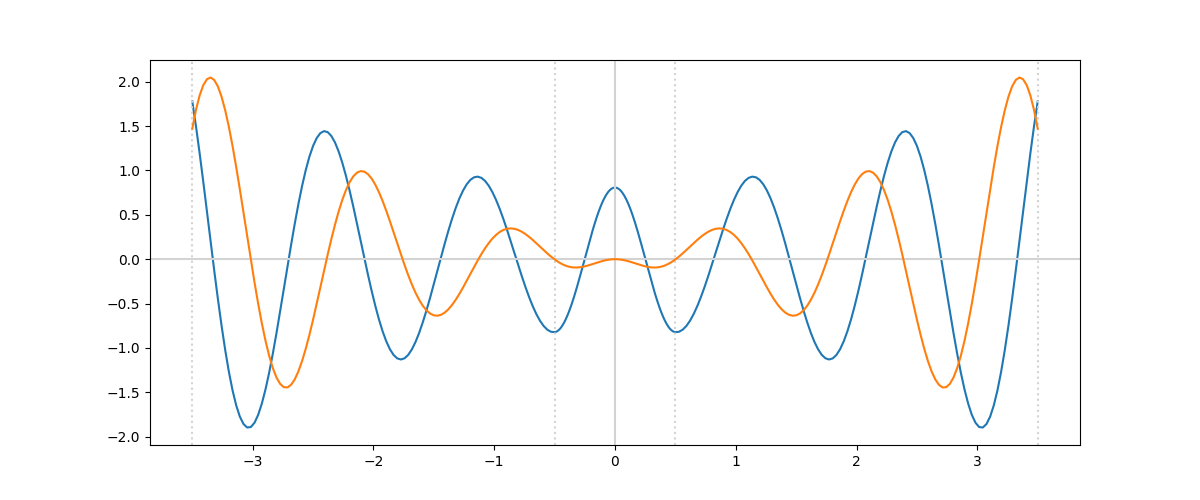

In [4]:
A.plot_field_1d(Fe, part='real')
A.add_1d_plot(Fe, part='imag')
# plt.ylim(-1,1)

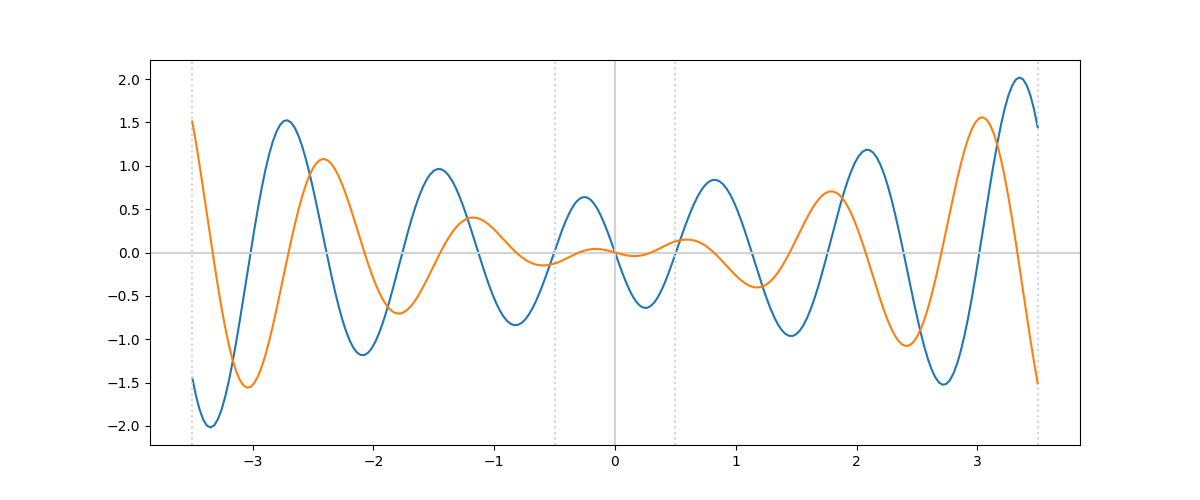

In [6]:
A.plot_field_1d(Fo, part='real')
A.add_1d_plot(Fo, part='imag')

### Previous Method

In [7]:
Z = .5+.5j
Fe = A.fields_Z(Z, mode_type='radiation')
Fo = A.fields_Z(Z, mode_type='radiation', sign='-1')

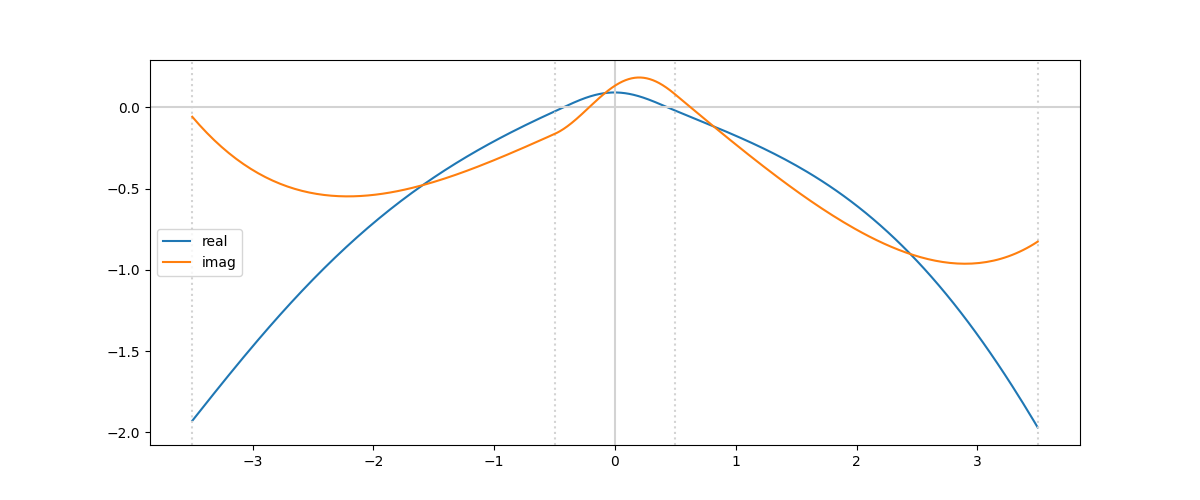

In [8]:
A.plot_field_1d(Fe, part='real', label='real')
A.add_1d_plot(Fe, part='imag', label='imag')
plt.legend();

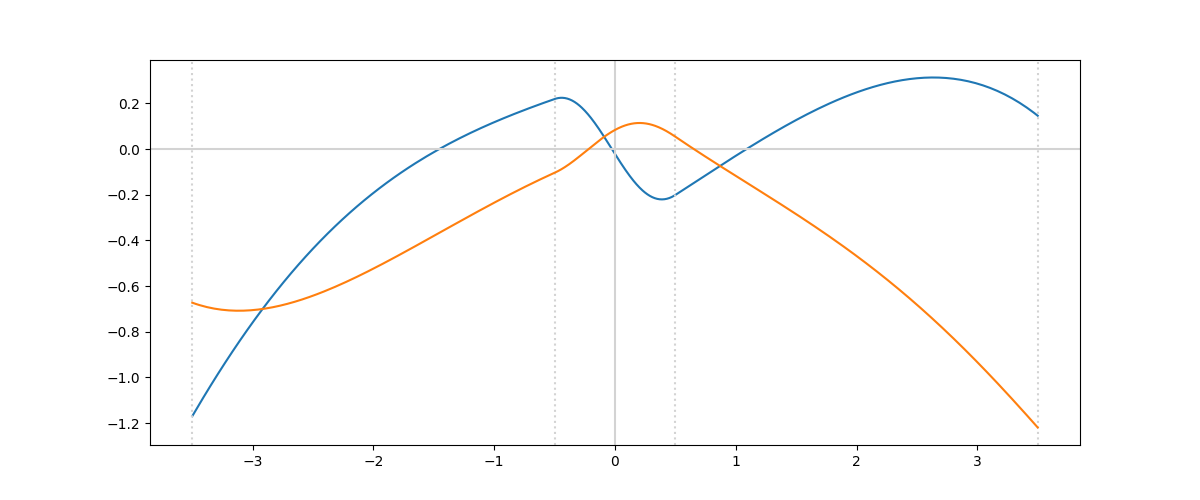

In [9]:
A.plot_field_1d(Fo, part='real')
A.add_1d_plot(Fo, part='imag')

### Notes

- Clearly the previous method fails to give even and odd classes for complex Z.  New method maintains this.

# Check Normalization

In [10]:
S = np.array([[0, 1], [1, 0]])

def det_orthog(Z):
    Ca = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='1').T
    Cb = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='-1').T

    Naa = (Ca[0].T @ S @ Ca[0] + Ca[-1].T @ S @ Ca[-1])
    Nbb = (Cb[0].T @ S @ Cb[0] + Cb[-1].T @ S @ Cb[-1])
    Nab = (Ca[0].T @ S @ Cb[0] + Ca[-1].T @ S @ Cb[-1])

    return (Naa * Nbb - Nab**2)**.5

def Naa(Z, sign='1'):
    Ca = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='1').T
    Naa = (Ca[0].T @ S @ Ca[0] + Ca[-1].T @ S @ Ca[-1])
    return Naa

def Nbb(Z, sign='1'):
    Cb = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='-1').T
    Nbb = (Cb[0].T @ S @ Cb[0] + Cb[-1].T @ S @ Cb[-1])
    return Nbb

def Nab(Z):
    Ca = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='1').T
    Cb = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='-1').T
    Nab = (Ca[0].T @ S @ Cb[0] + Ca[-1].T @ S @ Cb[-1])

    return Nab

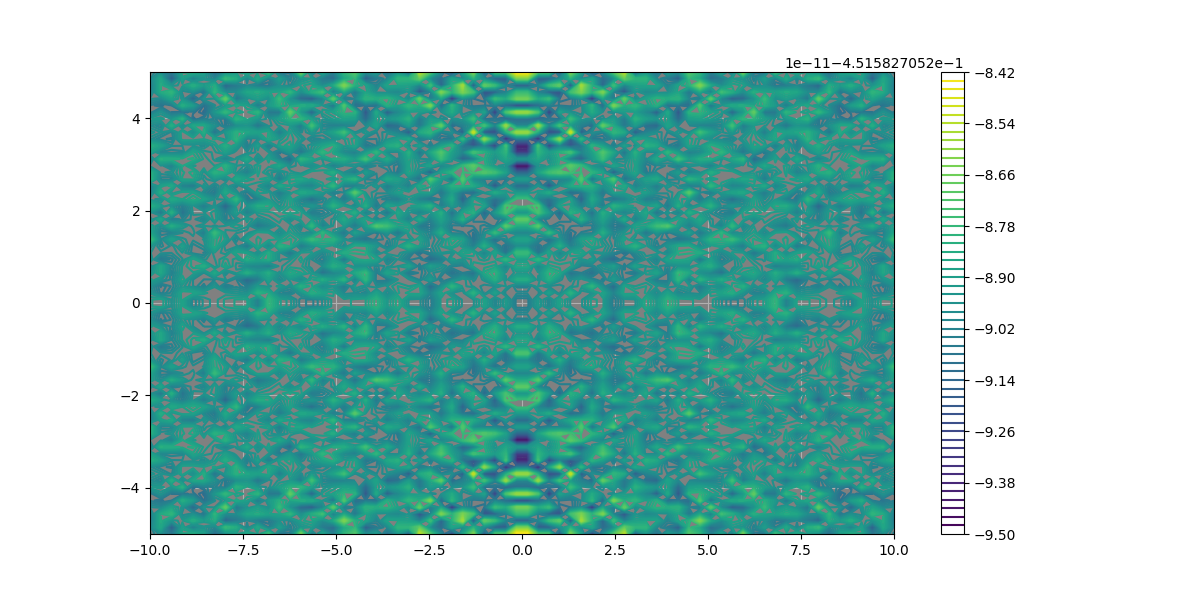

In [33]:
plt.close('all')
plotlogf(det_orthog,  -10, 10, -5, 5,  figsize=(12,6), iref=70, rref=70, levels=70, loop=True)

Though this seems bad, it is in fact what we want.  The det N is now constant, as any variation it would have had has been incorporated into the mode coefficients themselves.  So now we visualize those.

In [27]:
def M_det(Z):
    M = A.transmission_matrix_Z(Z)
    return M[..., 0,0] * M[..., 1,1]

def coeffs(Z):
    Ca = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='1').T
    Cb = A.coefficients_Z(Z, paper_method=False, mode_type='radiation', sign='-1').T
    return Ca[0,0]*Cb[0,0]

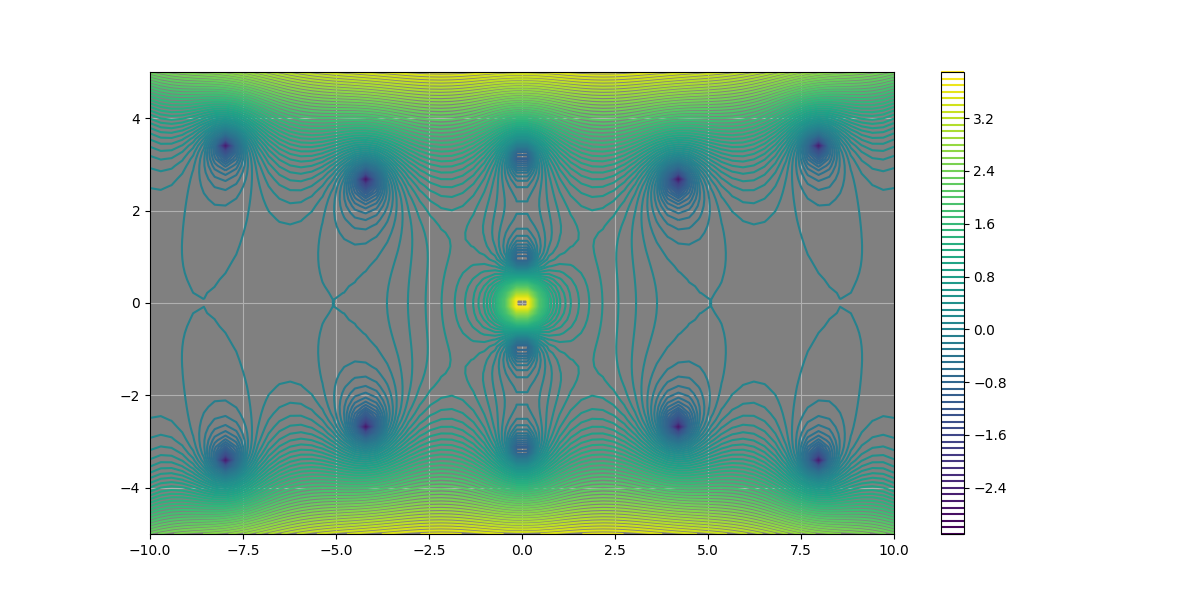

In [28]:
plotlogf(M_det,  -10, 10, -5, 5,  figsize=(12,6), iref=70, rref=70, levels=70)

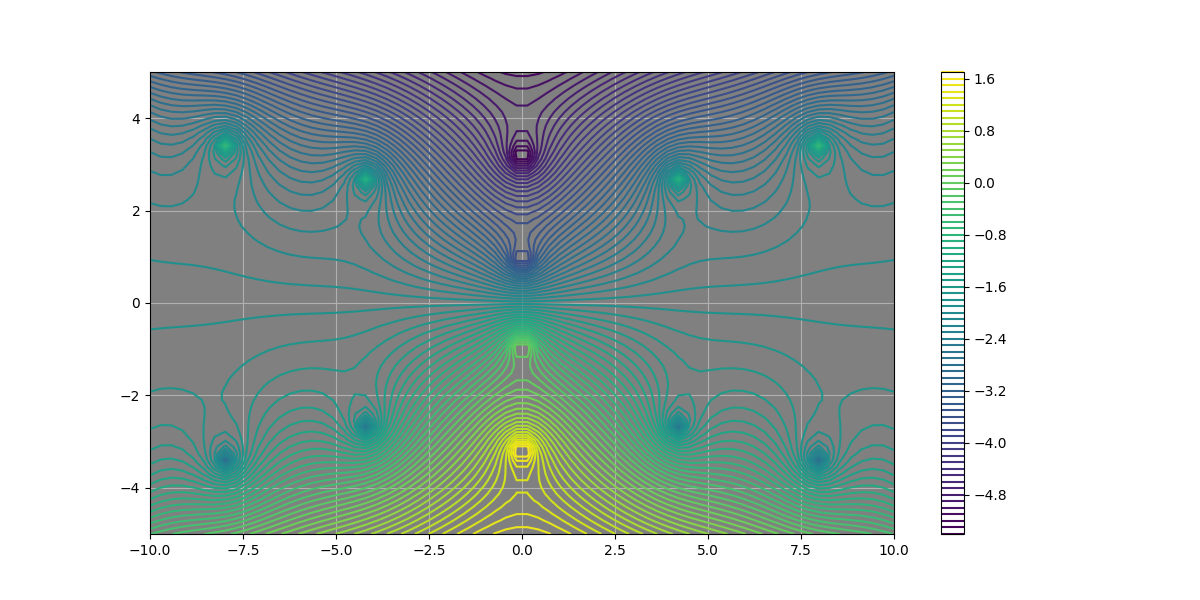

In [30]:
plt.close('all')
plotlogf(coeffs,  -10, 10, -5, 5,  figsize=(12,6), iref=70, rref=70, levels=70, loop=True)

### Notes

- This is what we want.  The coefficients have the poles we're expecting.

- Still need to propagate with these new classes and see if all the constants are right.

- I wonder if there is a way to salvage paper's method.  Especially to see if when we look at coefficient expressions along with determinant expression the plots look better.  There should be a way to do this if my theory is correct.  But it may require doing basically what we've already done with the non-orthogonal classes, in which case it should work fine.  The latter idea is to just take the v1 and v2 vectors as base, and do a non-orthogonal expansion with them.  So far trying this leads to same smears, with zeros of M entries as tips of smears.